#TODO Commento su grafico tre osservabili

<Figure size 1152x648 with 0 Axes>

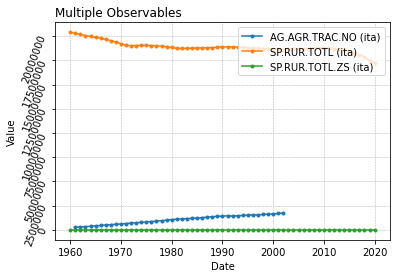

In [5]:
from opandas_wb.api.plots import *
ind_1 = 'AG.AGR.TRAC.NO'
ind_2 = 'SP.RUR.TOTL'
ind_3 = 'SP.RUR.TOTL.ZS'
country = 'ita'
indicators = [(ind_1, country), (ind_2, country), (ind_3, country)]
multi_indicator_plot(indicators).show()

#TODO Commento grafico covarianza

cov(AG.AGR.TRAC.NO,SP.RUR.TOTL)=-193974735025.69745


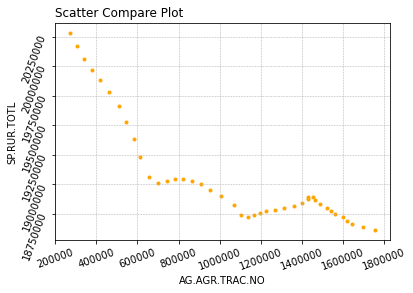

cov(AG.AGR.TRAC.NO,SP.RUR.TOTL.ZS)=-932980.7657119631


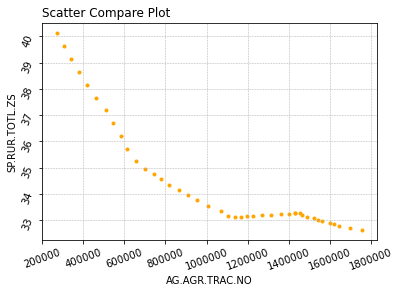

cov(SP.RUR.TOTL,SP.RUR.TOTL.ZS)=1423723.0456726772


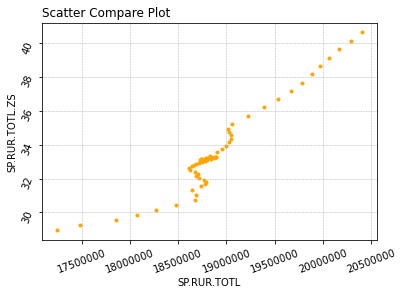

In [6]:
x_values = (ind_1, country)
y_values = (ind_2, country)
print("cov({},{})={}".format(ind_1, ind_2, covarianza(x_values, y_values)))
cmp_scatter_plot(x_values, y_values).show()

x_values = (ind_1, country)
y_values = (ind_3, country)
print("cov({},{})={}".format(ind_1, ind_3, covarianza(x_values, y_values)))
cmp_scatter_plot(x_values, y_values).show()

x_values = (ind_2, country)
y_values = (ind_3, country)
print("cov({},{})={}".format(ind_2, ind_3, covarianza(x_values, y_values)))
cmp_scatter_plot(x_values, y_values).show()

#TODO Commento differenze prime

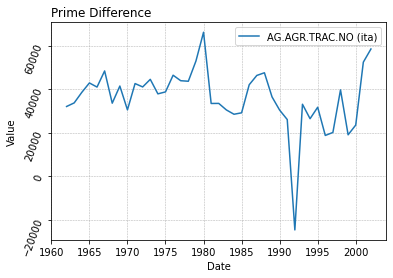

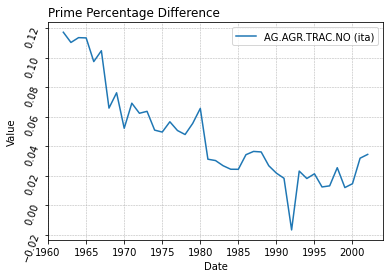

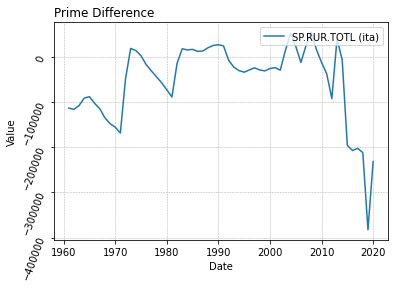

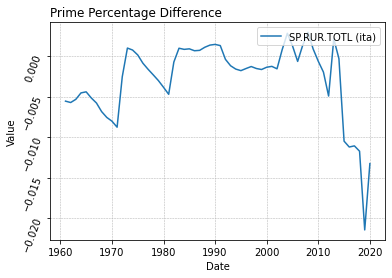

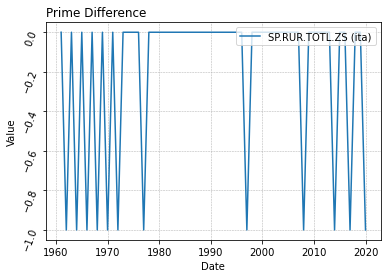

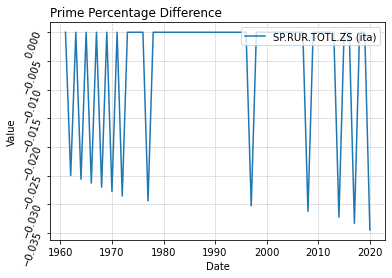

In [7]:
diff_prime(ind_1, country)
diff_prime_perc(ind_1, country).show()

diff_prime(ind_2, country)
diff_prime_perc(ind_2, country).show()

diff_prime(ind_3, country)
diff_prime_perc(ind_3, country).show()

#TODO Commentare retta regressione

<Figure size 1152x648 with 0 Axes>

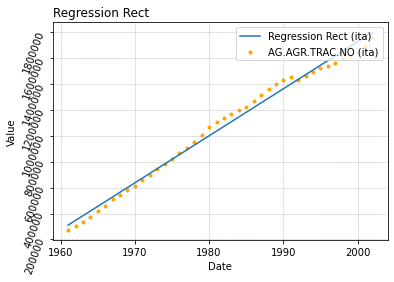

<Figure size 1152x648 with 0 Axes>

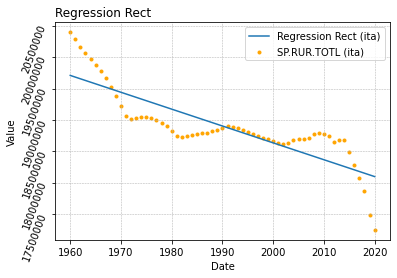

<Figure size 1152x648 with 0 Axes>

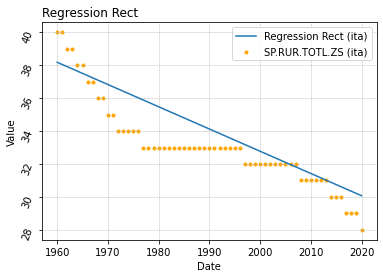

In [9]:
retta_reg(ind_1, country).show()
retta_reg(ind_2, country).show()
retta_reg(ind_3, country).show()